## ALE Plot for Random Forest Model

In [1]:
from sklearn.ensemble import RandomForestRegressor
import shap
import pandas as pd
from sklearn.model_selection import train_test_split
from PyALE import ale
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel('C:/Users/wenhu/Desktop/Python/Urban.xlsx')
x = data.iloc[:, 6: 42]
y = data.iloc[:, 5]

In [3]:
y

0        1.752592
1        1.752592
2        1.752592
3        1.752592
4        1.752592
           ...   
36548    0.000000
36549    0.000000
36550    0.000000
36551    0.000000
36552    0.000000
Name: pulmonary, Length: 36553, dtype: float64

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)
regr = RandomForestRegressor(n_estimators=1000, random_state=0)
regr.fit(x_train, y_train.values.ravel())

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [5]:
predictions = regr.predict(x_test)
regr.predict(x.iloc[0:1,:])

array([1.72083345])

In [6]:
importances = list(regr.feature_importances_)
characteristics = x.columns
characteristics_importances = [(characteristic, round(importance, 2)) for characteristic, importance in zip(characteristics, importances)]
characteristics_importances = sorted(characteristics_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in characteristics_importances];

Variable: O3                   Importance: 0.35
Variable: Age 0to4             Importance: 0.31
Variable: Non MAP              Importance: 0.06
Variable: Distance to city     Importance: 0.04
Variable: NO2                  Importance: 0.04
Variable: Low education        Importance: 0.03
Variable: Not in labour        Importance: 0.03
Variable: Distance to healthcare Importance: 0.03
Variable: Minority             Importance: 0.02
Variable: CO                   Importance: 0.02
Variable: Heatwave             Importance: 0.01
Variable: One family           Importance: 0.01
Variable: Low income           Importance: 0.01
Variable: Female               Importance: 0.01
Variable: Rented               Importance: 0.01
Variable: Indegious            Importance: 0.01
Variable: SO2                  Importance: 0.01
Variable: AOD                  Importance: 0.0
Variable: Age 65+              Importance: 0.0
Variable: House size           Importance: 0.0
Variable: Childcare            Importance

ALE plot

PyALE._ALE_generic:INFO: Continuous feature detected.


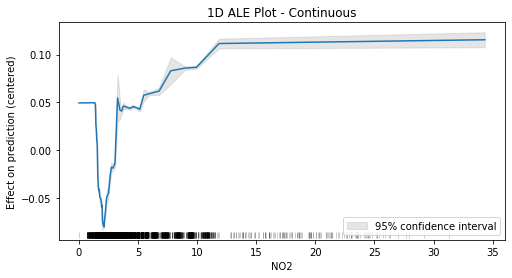

In [8]:
ale_eff = ale(X=x_test, model = regr, feature=["NO2"], grid_size=50, include_CI=True, C=0.95)
plt.savefig("C:/Users/wenhu/Desktop/Python/ALE_pulmonary_NO2.jpg")

Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().


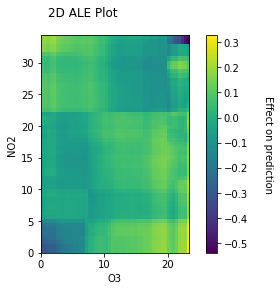

In [9]:
ale_eff = ale(X=x_test, model = regr, feature=["NO2","O3"], grid_size=50, include_CI=True, C=0.95)
plt.savefig("C:/Users/wenhu/Desktop/Python/ALE_pulmonary_NO2.jpg")